# Importing modules

So as in subpart (a), here again we begin our process with the standard procedure of importing of required modules. 
Like above 
cv2 is for openCV
matplotlib for plotting the images
keras api using tensorflow backend
the different layers required for CNN
os for loading the images
numpy for standard numerical calculation

In [54]:
import cv2
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D,Conv2D, MaxPooling2D
from keras.utils import np_utils,to_categorical
from keras.datasets import mnist
import os
import numpy as np
from keras.callbacks import ModelCheckpoint

# Defining of one_hot vector

For better results let us define the one hot vector encoding for each symbol

In [2]:
#We create a function to create a one_hot vector. Although it is a list now, will be converted into an array later
def one_hot(value,size):
    arr=np.array([0]*size);
    arr[value]=1;
    return arr;

# Importing images

Next step includes loading the images into two lists defined below
Note:
    X=images loaded
    y=output one_hot vector

In [3]:
X,y=list(),list();#define empty list for loading images and output one-hot vector
#copying path and the folder contents from subpart a
path="D://datasets//IIIT_D//train";#path where the dataset is downloaded in my machine
fol=os.listdir(path)#list of files in the 'train' folder in the location D:\datasets\IIIT_D\train
size=10;
flag=0;
for val,i in enumerate(fol):
    path_n=os.path.join(path,i);
    for img_n in os.listdir(path_n):
        img=cv2.imread(os.path.join(path_n,img_n),cv2.IMREAD_GRAYSCALE)/255#normalize by dividing by 255 for better results.
        X.append((np.reshape(cv2.resize(img,(28,28)),(1*28*28))))#initially we obtained a 2d array. In order to fit it in our keras CNN model, we had to convert it into a 3d model. Also the image is downsized to avoid OOM (Out of Memory) exception
        y.append(one_hot(val,size))#store our results by converting it into a one-hot vector. Here the enumerate () returning counter val palys a very important role.
        if(val==9):
            flag=1;
            break;
    if(flag):
        break;

# Checking the inputted image for further preprocessing (if required)

We start by checking that only Samples from 0-9 have been loaded. Moreover we check the corresponding dimension of each training data and output each. Next we visualize the images of 5-6 random images to get idea of its dimension
Lastly since our data has been normalized by dividing by 255, we compare images with and without nomalization

In [4]:
print("Number of files scanned:",len(X));
print("Number of output vectors",len(y));

Number of files scanned: 361
Number of output vectors 361


In [5]:
img01=cv2.imread("D://datasets//IIIT_D//train//Sample003//img003-008.png",cv2.IMREAD_GRAYSCALE)
img02=cv2.imread("D://datasets//IIIT_D//train//Sample001//img001-010.png",cv2.IMREAD_GRAYSCALE)
img03=cv2.imread("D://datasets//IIIT_D//train//Sample008//img008-055.png",cv2.IMREAD_GRAYSCALE)
img04=cv2.imread("D://datasets//IIIT_D//train//Sample006//img006-004.png",cv2.IMREAD_GRAYSCALE)
img05=cv2.imread("D://datasets//IIIT_D//train//Sample010//img010-020.png",cv2.IMREAD_GRAYSCALE)
img11=img01/255;
img12=img02/255;
img13=img03/255;
img14=img04/255;
img15=img05/255;

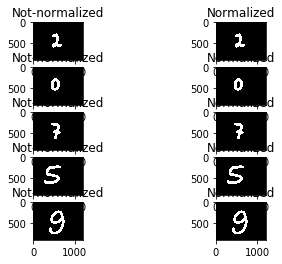

In [6]:
figure,axs=plt.subplots(5,2)
axs[0,0].imshow(img01,cmap=plt.cm.binary)
axs[0,0].set_title('Not-normalized')
axs[0,1].imshow(img11,cmap=plt.cm.binary)
axs[0,1].set_title('Normalized')
axs[1,0].imshow(img02,cmap=plt.cm.binary)
axs[1,0].set_title('Not-normalized')
axs[1,1].imshow(img12,cmap=plt.cm.binary)
axs[1,1].set_title('Normalized')
axs[2,0].imshow(img03,cmap=plt.cm.binary)
axs[2,0].set_title('Not-normalized')
axs[2,1].imshow(img13,cmap=plt.cm.binary)
axs[2,1].set_title('Normalized')
axs[3,0].imshow(img04,cmap=plt.cm.binary)
axs[3,0].set_title('Not-normalized')
axs[3,1].imshow(img14,cmap=plt.cm.binary)
axs[3,1].set_title('Normalized')
axs[4,0].imshow(img05,cmap=plt.cm.binary)
axs[4,0].set_title('Not-normalized')
axs[4,1].imshow(img15,cmap=plt.cm.binary)
axs[4,1].set_title('Normalized')
plt.show()

As the overlapping construct is very difficult to decipher let us keep only one title for each column, left one is dedicated for Not-normalized
whereas the right one is dedicated for Normalized

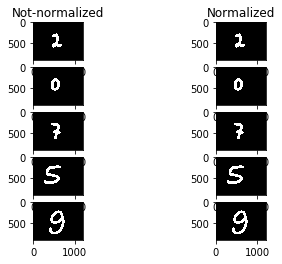

In [7]:
figure,axs=plt.subplots(5,2)
axs[0,0].imshow(img01,cmap=plt.cm.binary)
axs[0,0].set_title('Not-normalized')
axs[0,1].imshow(img11,cmap=plt.cm.binary)
axs[0,1].set_title('Normalized')
axs[1,0].imshow(img02,cmap=plt.cm.binary)
#axs[1,0].set_title('Not-normalized')
axs[1,1].imshow(img12,cmap=plt.cm.binary)
#axs[1,1].set_title('Normalized')
axs[2,0].imshow(img03,cmap=plt.cm.binary)
#axs[2,0].set_title('Not-normalized')
axs[2,1].imshow(img13,cmap=plt.cm.binary)
#axs[2,1].set_title('Normalized')
axs[3,0].imshow(img04,cmap=plt.cm.binary)
#axs[3,0].set_title('Not-normalized')
axs[3,1].imshow(img14,cmap=plt.cm.binary)
#axs[3,1].set_title('Normalized')
axs[4,0].imshow(img05,cmap=plt.cm.binary)
#axs[4,0].set_title('Not-normalized')
axs[4,1].imshow(img15,cmap=plt.cm.binary)
#axs[4,1].set_title('Normalized')
plt.show()

Ok all good we are all set with the nomalizing job and we can safely confirm that the images are not distorted or disturbed by this action.
Next we convert the training sets into numpy arrays and divide them into training and cross validation sets

# Splitting into training and cross validation sets

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.3, random_state=42)
X_train_arr=np.array(X_train)
X_val_arr=np.array(X_val)
y_train_arr=np.array(y_train)
y_val_arr=np.array(y_val)
_,d=X_train_arr.shape

In [9]:
print('X_dimensions:',X_train_arr.shape)
print('y_dimensions:',y_train_arr.shape)

X_dimensions: (306, 784)
y_dimensions: (306, 10)


# Creation of the CNN network

Now it is time to create our Sequential CNN model. We shall start with small networks and then poceed to bigger networks. 
Number of epochs let us fix at 8 for now later if this does not works we shall modify

Pretty decent but need to work on the accuracy and validating accuracy. Thus, to do so we have to train our data some more. But if we add more and more layers, we might enter overfitting. First let us see with increasing the number of perceptrons

No led to overfitting so this model will not work

Let us add more layers

In [41]:
ganguly = Sequential()
ganguly.add(Dense(300, activation='relu', input_shape=(d,)))
ganguly.add(Dropout(0.2))
ganguly.add(Dense(200, activation='relu'))
ganguly.add(Dropout(0.2))
ganguly.add(Dense(10, activation='softmax'))
ganguly.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 300)               235500    
_________________________________________________________________
dropout_23 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 200)               60200     
_________________________________________________________________
dropout_24 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 10)                2010      
Total params: 297,710
Trainable params: 297,710
Non-trainable params: 0
_________________________________________________________________


In [47]:
ganguly.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
filepath="IIITD_MIDAS_Task2_subpart2.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
feeds=ganguly.fit(x=X_train_arr,y=y_train_arr,epochs=30,validation_data=(X_val_arr,y_val_arr))
#print(feeds.history)
print("Final accuracy on the training data is:",feeds.history['acc'][-1]);
print("Cross_Validating accuracy is:",feeds.history['val_acc'][-1]);

Train on 252 samples, validate on 109 samples
Epoch 1/30
252/252 [==============================] - 2s 9ms/step - loss: 0.6026 - acc: 0.7738 - val_loss: 1.6941 - val_acc: 0.5872
Epoch 2/30
252/252 [==============================] - 0s 495us/step - loss: 0.5659 - acc: 0.7857 - val_loss: 1.9753 - val_acc: 0.5138
Epoch 3/30
252/252 [==============================] - 0s 491us/step - loss: 0.6621 - acc: 0.7579 - val_loss: 1.8140 - val_acc: 0.5138
Epoch 4/30
252/252 [==============================] - 0s 495us/step - loss: 0.5345 - acc: 0.8254 - val_loss: 1.8691 - val_acc: 0.5780
Epoch 5/30
252/252 [==============================] - 0s 492us/step - loss: 0.3680 - acc: 0.8532 - val_loss: 1.8652 - val_acc: 0.5596
Epoch 6/30
252/252 [==============================] - 0s 484us/step - loss: 0.4173 - acc: 0.8452 - val_loss: 2.1068 - val_acc: 0.5413
Epoch 7/30
252/252 [==============================] - 0s 485us/step - loss: 0.4150 - acc: 0.8492 - val_loss: 1.7917 - val_acc: 0.5688
Epoch 8/30
252/252

#Pretty decent training accuracy but let us save this model first and then try with increasing Perceptron heads

# Now it is time for some analysis as to how efficient our model is working. Let us check with our previously loaded images

2 with accuracy of 0.90901935


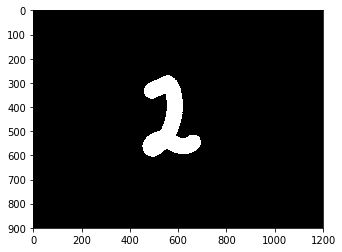

In [48]:
plt.imshow(img11,cmap=plt.cm.binary);
img1=np.reshape((cv2.resize(img11,(28,28))),(1*28*28))
predict=ganguly.predict(np.array([img1]))[0]
acc=max(predict)
val=np.argmax(predict)
print(val,"with accuracy of",acc)
plt.show()

0 with accuracy of 0.9082631


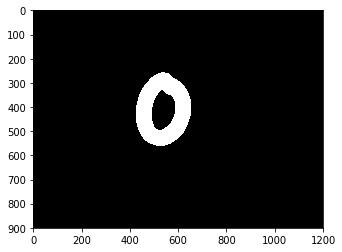

In [49]:
plt.imshow(img12,cmap=plt.cm.binary);
img1=np.reshape((cv2.resize(img12,(28,28))),(28*28*1))
predict=ganguly.predict(np.array([img1]))[0]
acc=max(predict)
val=np.argmax(predict)
print(val,"with accuracy of",acc)
plt.show()

# Load MNIST data

Since I am using the Keras API so call the mnist data from kera model itself. According to the structure of data, I have created my network. The images has dimension of (70000,728) model. How 728? Well they are 28 by 28 size handwritten images. To stepdown a bit the standard 3D images of the dimension of (28,28,1) has been reduced to a 1D array of (28x28x1) dimension or 728.
Now in all we have 70000 images splitted as 60000 training and 10000 test set.

In [55]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
img_size=1*28*28;
X_train = X_train.reshape(X_train.shape[0], img_size)
X_test = X_test.reshape(X_test.shape[0], img_size)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [57]:
values=ganguly.evaluate(X_test,y_test)
print('Loss:',values[0],'Accuracy:',values[1])

10000/10000 [==============================] - 2s 174us/step
Loss: 11.283486407470702 Accuracy: 0.1154


# Disaster in results

Now look initially these were my results. No matter how much I try, I could not get my accuracy above 15%. I was convinced there is some issue with my pre-processing

Although the results were far from being good. I still could not figure my problem out. Suddenly while googling about the MNIST dataset, I found the issue. Let me show you what was the issue.

# Spotting the difference

Here I present before you my image data and beside I have the standard MNIST data

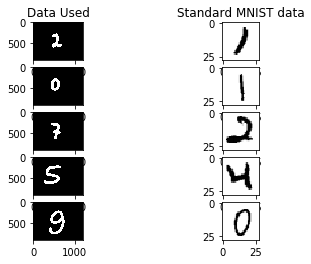

In [70]:
figure,axs=plt.subplots(5,2)
axs[0,0].imshow(img11,cmap=plt.cm.binary)
axs[0,0].set_title('Data Used')
axs[0,1].imshow(np.reshape(X_train[78],(28,28)),cmap=plt.cm.binary)
axs[0,1].set_title('Standard MNIST data')
axs[1,0].imshow(img12,cmap=plt.cm.binary)
#axs[1,0].set_title('Data Used')
axs[1,1].imshow(np.reshape(X_train[8],(28,28)),cmap=plt.cm.binary)
#axs[1,1].set_title('Standard MNIST Data')
axs[2,0].imshow(img13,cmap=plt.cm.binary)
#axs[2,0].set_title('Data Used')
axs[2,1].imshow(np.reshape(X_train[1010],(28,28)),cmap=plt.cm.binary)
#axs[2,1].set_title('Standard MNIST Data')
axs[3,0].imshow(img14,cmap=plt.cm.binary)
#axs[3,0].set_title('Data Used')
axs[3,1].imshow(np.reshape(X_train[20],(28,28)),cmap=plt.cm.binary)
#axs[3,1].set_title('Standard MNIST Data')
axs[4,0].imshow(img15,cmap=plt.cm.binary)
#axs[4,0].set_title('Data Used')
axs[4,1].imshow(np.reshape(X_train[1000],(28,28)),cmap=plt.cm.binary)
#axs[4,1].set_title('Standard MNIST Data')
plt.show()

First difference is that in the standard MNIST data our background is white and value is in black and in the Data used. As per my understanding that matters. If you provide something out of domain, it might affect. Let us invert the background and text color by using the simple priciples of Image processing and then train our network

# Inverting the images and storing

In [108]:
for i in range(len(X)):
    layer=X[i];
    for j in range(len(layer)):
        layer[j]=(255-layer[j]);

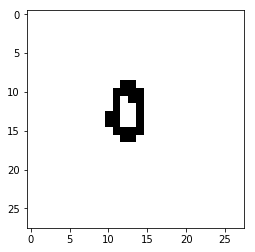

In [109]:
plt.imshow(np.reshape(X[10],(28,28)),cmap=plt.cm.binary)

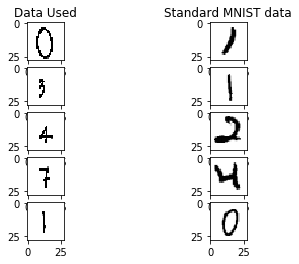

In [110]:
figure,axs=plt.subplots(5,2)
axs[0,0].imshow(np.reshape(X[2],(28,28)),cmap=plt.cm.binary)
axs[0,0].set_title('Data Used')
axs[0,1].imshow(np.reshape(X_train[78],(28,28)),cmap=plt.cm.binary)
axs[0,1].set_title('Standard MNIST data')
axs[1,0].imshow(np.reshape(X[150],(28,28)),cmap=plt.cm.binary)
#axs[1,0].set_title('Data Used')
axs[1,1].imshow(np.reshape(X_train[8],(28,28)),cmap=plt.cm.binary)
#axs[1,1].set_title('Standard MNIST Data')
axs[2,0].imshow(np.reshape(X[180],(28,28)),cmap=plt.cm.binary)
#axs[2,0].set_title('Data Used')
axs[2,1].imshow(np.reshape(X_train[1010],(28,28)),cmap=plt.cm.binary)
#axs[2,1].set_title('Standard MNIST Data')
axs[3,0].imshow(np.reshape(X[300],(28,28)),cmap=plt.cm.binary)
#axs[3,0].set_title('Data Used')
axs[3,1].imshow(np.reshape(X_train[20],(28,28)),cmap=plt.cm.binary)
#axs[3,1].set_title('Standard MNIST Data')
axs[4,0].imshow(np.reshape(X[50],(28,28)),cmap=plt.cm.binary)
#axs[4,0].set_title('Data Used')
axs[4,1].imshow(np.reshape(X_train[1000],(28,28)),cmap=plt.cm.binary)
#axs[4,1].set_title('Standard MNIST Data')
plt.show()

Somewhere it makes sense now. Let us retrain our network and then check our accuracy

In [111]:
from sklearn.model_selection import train_test_split
X_retrain,X_val,y_retrain,y_val=train_test_split(X,y,test_size=0.3, random_state=42)
X_train_arr=np.array(X_retrain)/255
X_val_arr=np.array(X_val)/255
y_train_arr=np.array(y_retrain)
y_val_arr=np.array(y_val)
_,d=X_train_arr.shape

In [125]:
ganguly = Sequential()
ganguly.add(Dense(500, activation='relu', input_shape=(d,)))
ganguly.add(Dropout(0.3))
ganguly.add(Dense(300, activation='relu'))
ganguly.add(Dropout(0.2))
ganguly.add(Dense(100, activation='relu'))
ganguly.add(Dropout(0.2))
ganguly.add(Dense(10, activation='softmax'))
ganguly.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_74 (Dense)             (None, 500)               392500    
_________________________________________________________________
dropout_44 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_75 (Dense)             (None, 300)               150300    
_________________________________________________________________
dropout_45 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_76 (Dense)             (None, 100)               30100     
_________________________________________________________________
dropout_46 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_77 (Dense)             (None, 10)                1010      
Total para

In [126]:
ganguly.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
filepath="IIITD_MIDAS_Task2_subpart2_retrain.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
feeds=ganguly.fit(x=X_train_arr,y=y_train_arr,epochs=30,validation_data=(X_val_arr,y_val_arr))
#print(feeds.history)
print("Final accuracy on the training data is:",feeds.history['acc'][-1]);
print("Cross_Validating accuracy is:",feeds.history['val_acc'][-1]);

Train on 252 samples, validate on 109 samples
Epoch 1/30
252/252 [==============================] - 4s 16ms/step - loss: 2.6647 - acc: 0.0833 - val_loss: 2.3121 - val_acc: 0.1193
Epoch 2/30
252/252 [==============================] - 0s 602us/step - loss: 2.4099 - acc: 0.1032 - val_loss: 2.2862 - val_acc: 0.0642
Epoch 3/30
252/252 [==============================] - 0s 594us/step - loss: 2.3843 - acc: 0.0754 - val_loss: 2.2924 - val_acc: 0.0917
Epoch 4/30
252/252 [==============================] - 0s 571us/step - loss: 2.3028 - acc: 0.1230 - val_loss: 2.2715 - val_acc: 0.0642
Epoch 5/30
252/252 [==============================] - 0s 609us/step - loss: 2.2691 - acc: 0.1151 - val_loss: 2.2489 - val_acc: 0.0917
Epoch 6/30
252/252 [==============================] - 0s 610us/step - loss: 2.2622 - acc: 0.1111 - val_loss: 2.2813 - val_acc: 0.0917
Epoch 7/30
252/252 [==============================] - 0s 701us/step - loss: 2.2789 - acc: 0.1310 - val_loss: 2.2755 - val_acc: 0.0917
Epoch 8/30
252/25

In [127]:
values=ganguly.evaluate(X_test,y_test)
print('Loss:',values[0],'Accuracy:',values[1])

10000/10000 [==============================] - 2s 200us/step
Loss: 2.3276687168121337 Accuracy: 0.0813


Note: The results are far below expectation and this model does worse than normal MNIST model. The convergence time is fast but accuracy is very low